In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Q-A. Daily attendance of bike tracks
Every row contains the number of bicycles on every track of the city(montreal), for every day of the year.

# 1.Read CSV file

In [96]:
path = r"code\data\bikes.csv"
bikes = pd.read_csv(path)
bikes

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0
...,...,...,...,...,...,...,...,...,...,...
256,14/09/2013,00:00,2488,1494,1706,2911,979,1075,3277,2456
257,15/09/2013,00:00,2243,1749,1417,2933,1804,1459,3623,2527
258,16/09/2013,00:00,4206,2466,2799,5485,3272,855,4307,3012
259,17/09/2013,00:00,5506,3153,3563,6626,3882,1485,5332,3745


# 2.Check head

In [54]:
bikes.head()

,Date,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
0,01/01/2013,00:00,0,0,1,0,6,0,1,0
1,02/01/2013,00:00,69,0,13,0,18,0,2,0
2,03/01/2013,00:00,69,2,21,6,22,1,0,0
3,04/01/2013,00:00,80,0,22,4,16,0,125,0
4,05/01/2013,00:00,52,4,19,3,12,0,97,0


# 3. Check summary statistics

In [55]:
bikes.describe()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,2743.390805,1221.858238,1757.590038,3224.130268,1669.425287,1152.885057,3084.425287,1858.793103
std,2247.957848,1070.037364,1458.793882,2589.514354,1363.738862,1208.848429,2380.255540,1434.899574
min,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
25%,392.000000,12.000000,236.000000,516.000000,222.000000,12.000000,451.000000,340.000000
50%,2771.000000,1184.000000,1706.000000,3178.000000,1584.000000,818.000000,3111.000000,2087.000000
75%,4767.000000,2168.000000,3158.000000,5812.000000,3068.000000,2104.000000,5338.000000,3168.000000
max,6803.000000,3330.000000,4716.000000,7684.000000,4103.000000,4841.000000,8555.000000,4293.000000


# 4. plot the daily attendance of two tracks, 'Berri1', 'PierDup'

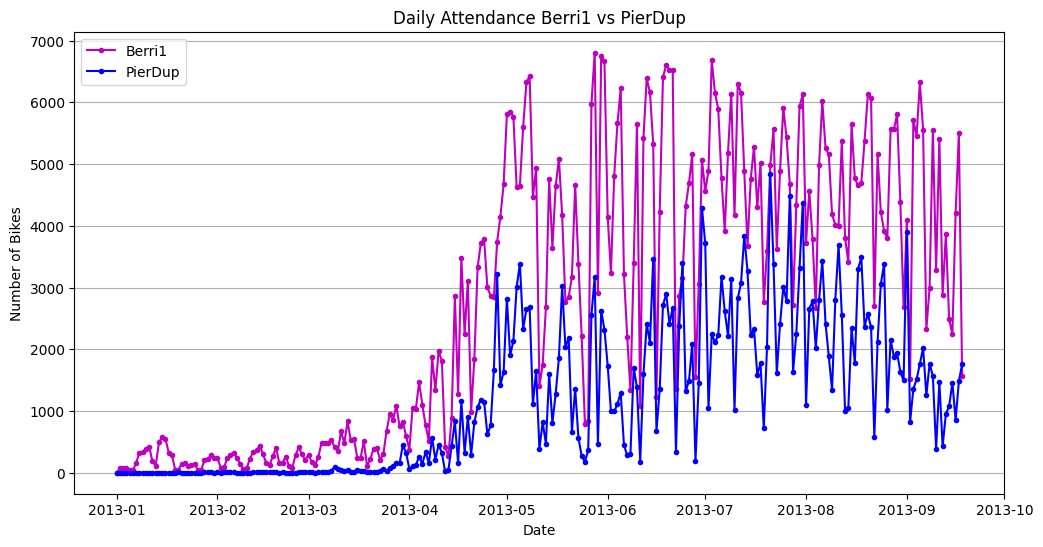

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(bikes['Date'], bikes['Berri1'], label='Berri1', color='m',marker=".",)
plt.plot(bikes['Date'], bikes['PierDup'], label='PierDup', color='b',marker=".")
plt.xlabel('Date')
plt.ylabel('Number of Bikes')
plt.grid(axis='y')
plt.title('Daily Attendance Berri1 vs PierDup')
plt.legend()
plt.show()

In [100]:
bikes['Date'] = pd.to_datetime(bikes['Date'], dayfirst=True)

### 5. Check index , explore weekday_name attributes 

In [102]:
bikes.set_index('Date', inplace=True)
bikes.head()

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Date,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0
2013-01-02,00:00,69,0,13,0,18,0,2,0
2013-01-03,00:00,69,2,21,6,22,1,0,0
2013-01-04,00:00,80,0,22,4,16,0,125,0
2013-01-05,00:00,52,4,19,3,12,0,97,0


In [103]:
bikes['Weekday_name'] = bikes.index.day_name()
bikes.head()

,Unnamed: 1,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,Weekday_name
Date,,,,,,,,,,
2013-01-01,00:00,0,0,1,0,6,0,1,0,Tuesday
2013-01-02,00:00,69,0,13,0,18,0,2,0,Wednesday
2013-01-03,00:00,69,2,21,6,22,1,0,0,Thursday
2013-01-04,00:00,80,0,22,4,16,0,125,0,Friday
2013-01-05,00:00,52,4,19,3,12,0,97,0,Saturday


### 6. Get sum of all attendance as a function of the weekday

In [105]:
bikes.drop('Unnamed: 1',axis=1,inplace=True)


In [84]:
bikes.head()

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier,Weekday_name
Date,,,,,,,,,
2013-01-01,0,0,1,0,6,0,1,0,Tuesday
2013-01-02,69,0,13,0,18,0,2,0,Wednesday
2013-01-03,69,2,21,6,22,1,0,0,Thursday
2013-01-04,80,0,22,4,16,0,125,0,Friday
2013-01-05,52,4,19,3,12,0,97,0,Saturday


In [106]:
total_sum = bikes.groupby('Weekday_name').sum()
total_sum

,Berri1,CSC,Mais1,Mais2,Parc,PierDup,Rachel1,Totem_Laurier
Weekday_name,,,,,,,,
Friday,105701,44252,71605,127526,64385,36850,118556,71426
Monday,106826,51646,68087,129982,69767,44500,119211,72883
Saturday,75754,27226,45947,79743,35544,46149,97143,56438
Sunday,74873,29181,40812,75746,37620,53812,100735,53798
Thursday,115193,52340,76273,141424,73668,36349,120684,74540
Tuesday,117244,54656,76974,141217,74299,40679,123533,76559
Wednesday,120434,59604,79033,145860,80437,42564,125173,79501


### 7. Display this in figure , what is the inference?

In [152]:
attend = total_sum.sum(axis=1)
attend

Weekday_name
Friday       640301
Monday       662902
Saturday     463944
Sunday       466577
Thursday     690471
Tuesday      705161
Wednesday    732606
dtype: int64

In [154]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
attend= attend.reindex(order)
attend

Weekday_name
Monday       662902
Tuesday      705161
Wednesday    732606
Thursday     690471
Friday       640301
Saturday     463944
Sunday       466577
dtype: int64

<Axes: xlabel='Weekday_name'>

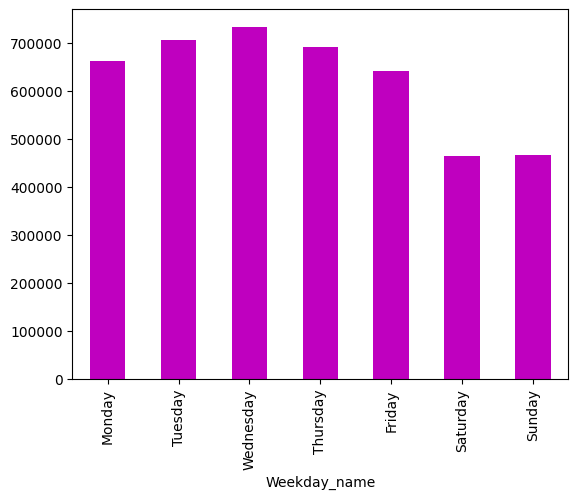

In [164]:
attend.plot(kind='bar',color="m")

# Inference 

Inference : There are more attendances on weekdays than on weekends. Among the weekdays, Wednesday has the highest number of bikes, followed by Tuesday and Thursday. This shows that we can see more bikes on the tracks in the middle of the week.